# Example End to End using API Python

---
This Jupyter include examples of adding system and simulation objects, running a model a query to some specific solutions.

---
**Created by:** Juan Jose Astudillo  
**Date:** Oct 25, 2024  
**Project:** Exercise End to End using PLEXOS API Python


---
### Import package will be used

In [1]:
import os, sys, re, clr, csv
from shutil import copyfile
import pandas as pd
import subprocess as sp
from os.path import dirname, join
from System.IO import SearchOption as SearchOption
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, Animation, ArtistAnimation
from datetime import datetime
import numpy as np
from System import *

---
### Load PLEXOS assemblies 

In [2]:
sys.path.append('C:/Program Files/Energy Exemplar/PLEXOS 10.0 API/')
clr.AddReference('PLEXOS_NET.Core')
clr.AddReference('EEUTILITY')
clr.AddReference('EnergyExemplar.PLEXOS.Utility')

from PLEXOS_NET.Core import *
from EEUTILITY.Enums import *
from EnergyExemplar.PLEXOS.Utility.Enums import *

---
### Set the Folder work and Name of .xml 

In [4]:
# Working directory
working_directory = r'C:\Users\juanjose.astudillo\OneDrive - Energy Exemplar Pty Ltd\Documents\PLEXOS\Training\API'  ### UPDATE to your work location

os.chdir(working_directory) 
# Create a copy of the base database
def copy_database(original_ds, new_ds):
    if os.path.exists(original_ds):
    #delete copy if already exists
        if os.path.exists(new_ds):
            os.remove(new_ds)
    copyfile(original_ds,new_ds)

original_file = 'Base.xml'
copy_file = 'Complete.xml'
copy_database(r'.\{}'.format(original_file),r'.\{}'.format(copy_file))

---
### Connecting to dataset and printing useful .csv for work.

In [5]:
# Create an object to store the input data
db = DatabaseCore()
db.DisplayAlerts = False
db.Connection(copy_file)

## Important Step:
classes = db.FetchAllClassIds()
collections = db.FetchAllCollectionIds()
properties = db.FetchAllPropertyEnums()
attributes = db.FetchAllAttributeEnums()

# Print the list of all keys (properties)
all_keys_prop = list(properties.keys())
keys_prop = pd.DataFrame({'Properties': all_keys_prop})
keys_prop.to_csv('Keys_Properties.csv')
# Print the list of all keys (collections)
all_keys_collec = list(collections.keys())
keys_collec = pd.DataFrame({'Properties': all_keys_collec})
keys_collec.to_csv('Keys_Collections.csv')
#  Print the list of all keys (classes)
all_keys_class = list(classes.keys())
keys_class = pd.DataFrame({'Properties': all_keys_class})
keys_class.to_csv('Keys_Classes.csv')
#  Print the list of all keys (attribute)
all_keys_attri = list(attributes.keys())
keys_attri = pd.DataFrame({'Properties': all_keys_attri})
keys_attri.to_csv('Keys_Attributes.csv')

---
### Function to add an object and membership
    '''
    Int32 AddObject(
    	String strName,
    	ClassEnum nClassId,
    	Boolean bAddSystemMembership,
    	String strCategory[ = None],
    	String strDescription[ = None]
    	)
    '''

    '''
    Int32 AddMembership(
    	CollectionEnum nCollectionId,
    	String strParent,
    	String strChild
    	)
    '''

In [6]:
## Add Region
db.AddObject('Region', classes["Region"], True, None, 'Testing the API')
## Add Nodes
db.AddObject('Node1', classes["Node"], True, None, 'Testing the API')
db.AddObject('Node2', classes["Node"], True, None, 'Testing the API')
db.AddObject('Node3', classes["Node"], True, None, 'Testing the API')

## Add Memberships of Nodes
db.AddMembership(collections["NodeRegion"],'Node1','Region')
db.AddMembership(collections["NodeRegion"],'Node2','Region')
db.AddMembership(collections["NodeRegion"],'Node3','Region')

# Get the System.Generators membership ID
Region_ID = db.GetMembershipID(collections["SystemRegions"],'System', 'Region')
Node1_ID = db.GetMembershipID(collections["SystemNodes"],'System', 'Node1')
Node2_ID = db.GetMembershipID(collections["SystemNodes"],'System', 'Node2')
Node3_ID = db.GetMembershipID(collections["SystemNodes"],'System', 'Node3')

print('Region, Nodes and Membership created')

Region, Nodes and Membership created


---
### Function to add properties
    '''
    Int32 AddProperty(
    	Int32 MembershipId,
    	Int32 EnumId,
    	Int32 BandId,
    	Double Value,
    	Object DateFrom,
    	Object DateTo,
    	Object Variable,
    	Object DataFile,
    	Object Pattern,
    	Object Scenario,
    	Object Action,
    	PeriodEnum PeriodTypeId
    	)   
    '''

In [7]:
## Add Lines
db.AddObject('L1-2', classes["Line"], True, None, 'Line added using API')
db.AddMembership(collections["LineNodeFrom"],'L1-2','Node1')
db.AddMembership(collections["LineNodeTo"],'L1-2','Node2')
Line_ID = db.GetMembershipID(collections["SystemLines"],'System','L1-2')    
db.AddProperty(Line_ID,properties["SystemLines.Units"],1,1.0,None,None,None,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(Line_ID,properties["SystemLines.MaxFlow"],1,2000.0,None,None,None,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(Line_ID,properties["SystemLines.Resistance"],1,0.1,None,None,None,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(Line_ID,properties["SystemLines.Reactance"],1,0.1,None,None,None,None,None,None,0,PeriodEnum.Interval)

db.AddObject('L3-1', classes["Line"], True, None, 'Line added using API')
db.AddMembership(collections["LineNodeFrom"],'L3-1','Node3')
db.AddMembership(collections["LineNodeTo"],'L3-1','Node1')
Line_ID = db.GetMembershipID(collections["SystemLines"],'System','L3-1')    
db.AddProperty(Line_ID,properties["SystemLines.Units"],1,1.0,None,None,None,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(Line_ID,properties["SystemLines.MaxFlow"],1,2000.0,None,None,None,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(Line_ID,properties["SystemLines.Resistance"],1,0.1,None,None,None,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(Line_ID,properties["SystemLines.Reactance"],1,0.1,None,None,None,None,None,None,0,PeriodEnum.Interval)

print('Lines created')

Lines created


In [8]:
## Add Datafiles
Load_csv = r'Data\Load.csv'
Solar_csv = r'Data\Solar.csv'
Hydro_csv = r'Data\10samples_Hydro.csv'
Wind_csv = r'Data\10samples_Wind.csv'

Load = 'Load'
## Load
db.AddObject('Load', classes["DataFile"], True, None, 'Datafile added using API')
db.AddMembership(collections["SystemDataFiles"],None,'Load')
Load_ID = db.GetMembershipID(collections["SystemDataFiles"],'System','Load')    
db.AddProperty(Load_ID,properties["SystemDataFiles.Filename"],1,0,None,None,None,Load_csv,None,None,0,PeriodEnum.Interval)

## Solar
Solar = 'Solar'
db.AddObject('Solar', classes["DataFile"], True, None, 'Datafile added using API')
db.AddMembership(collections["SystemDataFiles"],None,'Solar')
Solar_ID = db.GetMembershipID(collections["SystemDataFiles"],'System','Solar')    
db.AddProperty(Solar_ID,properties["SystemDataFiles.Filename"],1,0,None,None,None,Solar_csv,None,None,0,PeriodEnum.Interval)

Wind = 'Wind'
## Wind
db.AddObject('Wind', classes["DataFile"], True, None, 'Datafile added using API')
db.AddMembership(collections["SystemDataFiles"],None,'Wind')
Wind_ID = db.GetMembershipID(collections["SystemDataFiles"],'System','Wind')    
db.AddProperty(Wind_ID,properties["SystemDataFiles.Filename"],1,0,None,None,None,Wind_csv,None,None,0,PeriodEnum.Interval)

Hydro = 'Hydro'
## Hydro
db.AddObject('Hydro', classes["DataFile"], True, None, 'Datafile added using API')
db.AddMembership(collections["SystemDataFiles"],None,'Hydro')
Hydro_ID = db.GetMembershipID(collections["SystemDataFiles"],'System','Hydro')    
db.AddProperty(Hydro_ID,properties["SystemDataFiles.Filename"],1,0,None,None,None,Hydro_csv,None,None,0,PeriodEnum.Interval)

print('Datafiles created')

Datafiles created


In [9]:
## Add Variables
## Wind
Wind_var = 'Piedrasdeafilar_Sim'
db.AddObject('Piedrasdeafilar_Sim', classes["Variable"], True, None, 'Variable added using API')
db.AddMembership(collections["SystemVariables"],None,'Piedrasdeafilar_Sim')
ID = db.GetMembershipID(collections["SystemVariables"],'System','Piedrasdeafilar_Sim')    
db.AddProperty(ID,properties["SystemVariables.SamplingMethod"],1,2.0,None,None,None,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(ID,properties["SystemVariables.Profile"],5,2.0,None,None,None,Wind,None,None,0,PeriodEnum.Interval)

## Hydro
Hydro_var = 'Salto_Sim'
db.AddObject('Salto_Sim', classes["Variable"], True, None, 'Variable added using API')
db.AddMembership(collections["SystemVariables"],None,'Salto_Sim')
ID = db.GetMembershipID(collections["SystemVariables"],'System','Salto_Sim')    
db.AddProperty(ID,properties["SystemVariables.SamplingMethod"],1,2.0,None,None,None,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(ID,properties["SystemVariables.Profile"],5,2.0,None,None,None,Hydro,None,None,0,PeriodEnum.Interval)

print('Variables created')
# db.Closed()

Variables created


---
### Add a category
    '''
    Int32 AddCategory(
    	ClassEnum nClassId,
    	String strCategory
    	)
    '''

In [10]:
### Add Generators Category
#Solar
db.AddCategory(classes["Generator"], 'Solar')
#Wind
db.AddCategory(classes["Generator"], 'Wind')
#Hydro
db.AddCategory(classes["Generator"], 'Hydro')
#Thermal
db.AddCategory(classes["Generator"], 'Thermal')

1

In [11]:
### WIND GENERATOR
db.AddObject('Wind', classes["Generator"], True, 'Wind', 'Generator added using API')
db.AddMembership(collections["GeneratorNodes"],'Wind','Node2')
GenID = db.GetMembershipID(collections["SystemGenerators"],'System','Wind')    
db.AddProperty(GenID,properties["SystemGenerators.Units"],1,60.0,None,None,None,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(GenID,properties["SystemGenerators.Rating"],1,0,None,None,Wind_var,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(GenID,properties["SystemGenerators.AuxIncr"],1,4.0,None,None,None,None,None,None,0,PeriodEnum.Interval)

### SOLAR GENERATOR
db.AddObject('Solar', classes["Generator"], True, 'Solar', 'Generator added using API')
db.AddMembership(collections["GeneratorNodes"],'Solar','Node2')
GenID = db.GetMembershipID(collections["SystemGenerators"],'System','Solar')
db.AddProperty(GenID,properties["SystemGenerators.Units"],1,1.0,None,None,None,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(GenID,properties["SystemGenerators.Rating"],1,0,None,None,None,Solar,None,None,0,PeriodEnum.Interval)
db.AddProperty(GenID,properties["SystemGenerators.AuxIncr"],1,3.35,None,None,None,None,None,None,0,PeriodEnum.Interval) 

### THERMAL GENERATOR
db.AddObject('Thermal', classes["Generator"], True, 'Thermal', 'Generator added using API')
db.AddMembership(collections["GeneratorNodes"],'Thermal','Node3')
GenID = db.GetMembershipID(collections["SystemGenerators"],'System','Thermal')
db.AddProperty(GenID,properties["SystemGenerators.Units"],1,1.0,None,None,None,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(GenID,properties["SystemGenerators.MaxCapacity"],1,400.0,None,None,None,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(GenID,properties["SystemGenerators.FuelPrice"],1,1.0,None,None,None,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(GenID,properties["SystemGenerators.HeatRate"],1,1.0,None,None,None,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(GenID,properties["SystemGenerators.VO&MCharge"],1,10,None,None,None,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(GenID,properties["SystemGenerators.ForcedOutageRate"],1,5.0,None,None,None,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(GenID,properties["SystemGenerators.MeanTimetoRepair"],1,24.0,None,None,None,None,None,None,0,PeriodEnum.Interval)

1

In [12]:
hidro_file = 'hidro_gen.csv'
hidro_config = pd.read_csv(filepath_or_buffer=hidro_file, header=0, skiprows=lambda x: x in [1, 1])

#### HYDRO WITHOUT STORAGE
for row in range(0, hidro_config.shape[0]):
    gen_name = '{}'.format(hidro_config['Generator'][row])
    Node_gen = hidro_config['Node'][row]
    Units = hidro_config['Units'][row]
    MaxCapacity = hidro_config['MaxCapacity'][row]
    MaxEnergyDay = hidro_config['MaxEnergyDay'][row]

    db.AddObject(str(gen_name), classes["Generator"], True, 'Hydro', 'Generator added using API')
    db.AddMembership(collections["GeneratorNodes"],str(gen_name),str(Node_gen))
    GenID = db.GetMembershipID(collections["SystemGenerators"],'System',str(gen_name))
    db.AddProperty(GenID,properties["SystemGenerators.Units"],1,Units.astype(np.float64),None,None,None,None,None,None,0,PeriodEnum.Interval)
    db.AddProperty(GenID,properties["SystemGenerators.MaxCapacity"],1,MaxCapacity.astype(np.float64),None,None,None,None,None,None,0,PeriodEnum.Interval)
    db.AddProperty(GenID,properties["SystemGenerators.MaxEnergyDay"],1,MaxEnergyDay.astype(np.float64),None,None,None,None,None,None,0,PeriodEnum.Day)


In [13]:
#### HYDRO WITH STORAGE
## Generator
db.AddObject('Salto Grande', classes["Generator"], True, 'Hydro', 'Generator added using API')
db.AddMembership(collections["GeneratorNodes"],'Salto Grande','Node1')
GenID = db.GetMembershipID(collections["SystemGenerators"],'System','Salto Grande')
db.AddProperty(GenID,properties["SystemGenerators.Units"],1,1.0,None,None,None,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(GenID,properties["SystemGenerators.MaxCapacity"],1,650.0,None,None,None,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(GenID,properties["SystemGenerators.EfficiencyIncr"],1,1.0,None,None,None,None,None,None,0,PeriodEnum.Interval)

## Storage
db.AddObject('Salto Grande', classes["Storage"], True, None, 'Storage added using API')
db.AddMembership(collections["GeneratorHeadStorage"],'Salto Grande','Salto Grande')
GenID = db.GetMembershipID(collections["SystemStorages"],'System','Salto Grande')
db.AddProperty(GenID,properties["SystemStorages.EndEffectsMethod"],1,1.0,None,None,None,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(GenID,properties["SystemStorages.MaxVolume"],1,5000000.0,None,None,None,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(GenID,properties["SystemStorages.InitialVolume"],1,2500000.0,None,None,None,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(GenID,properties["SystemStorages.NaturalInflow"],1,0,None,None,Hydro_var,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(GenID,properties["SystemStorages.WaterValue"],1,10.0,None,None,None,None,None,None,0,PeriodEnum.Interval)

## Waterway
db.AddObject('Salto Release', classes["Waterway"], True, None, 'Waterway added using API')
db.AddMembership(collections["WaterwayStorageFrom"],'Salto Release','Salto Grande')

1

In [14]:
## LOAD DEMAND
db.AddProperty(Region_ID,properties["SystemRegions.Load"],1,1.0,None,None,None,Load,None,None,0,PeriodEnum.Interval)

## LOAD PARTICIPATION FACTOR OF NODES
db.AddProperty(Node1_ID,properties["SystemNodes.LoadParticipationFactor"],1,0.0,None,None,None,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(Node2_ID,properties["SystemNodes.LoadParticipationFactor"],1,1.0,None,None,None,None,None,None,0,PeriodEnum.Interval)
db.AddProperty(Node3_ID,properties["SystemNodes.LoadParticipationFactor"],1,0.0,None,None,None,None,None,None,0,PeriodEnum.Interval)

1

---
### Configuration of SIMULATION objects
*Reminder:

	'''
    Int32 AddObject(
    	String strName,
    	ClassEnum nClassId,
    	Boolean bAddSystemMembership,
    	String strCategory[ = None],
    	String strDescription[ = None]
    	)
    '''

In [15]:
### Add Simulation objects
db.AddObject('Model Test', classes["Model"], True, None, 'Model added using API')
db.AddObject('Horizon Test', classes["Horizon"], True, None, 'Horizon added using API')
db.AddObject('Report Test', classes["Report"], True, None, 'Report added using API')
db.AddObject('STSchedule Test', classes["STSchedule"], True, None, 'STSchedule added using API')
db.AddObject('Stochastic Test', classes["Stochastic"], True, None, 'Stochastic added using API')
db.AddObject('Transmission Test', classes["Transmission"], True, None, 'Transmission added using API')
db.AddObject('Production Test', classes["Production"], True, None, 'Production added using API')
db.AddObject('Diagnostic Test', classes["Diagnostic"], True, None, 'Diagnostic added using API')

1

---
### Other functions
	'''
    Int32 CopyObject(
    	String strName,
    	String strNewName,
    	ClassEnum nClassId
    	)
    '''

  	'''
    Int32 RemoveMembership(
    	CollectionEnum nCollectionId,
    	String strParent,
    	String strChild
    	)
    '''

	'''
	As Long ddAttribute(
		nClassId As ClassEnum, 
		strObjectName As String, 
		nAttributeEnum As Long, 
		dValue As Double
		) 
	'''

In [16]:
### HORIZON SETTINGS

 # a list of tuples... these tuples match the signature of UpdateAttribute and AddAttribute
    #   i.e., (ClassEnum, String, Int32, Double)
attr = [(classes["Horizon"], 'Horizon Test', attributes["Horizon.DateFrom"], DateTime(2019,1,1).ToOADate()),
        (classes["Horizon"], 'Horizon Test', attributes["Horizon.StepType"], 1.0),
        (classes["Horizon"], 'Horizon Test', attributes["Horizon.StepCount"], 2.0),
        (classes["Horizon"], 'Horizon Test', attributes["Horizon.ChronoDateFrom"], DateTime(2019,1,1).ToOADate()),
        (classes["Horizon"], 'Horizon Test', attributes["Horizon.ChronoStepType"], 2.0),
        (classes["Horizon"], 'Horizon Test', attributes["Horizon.ChronoAtaTime"], 2.0),
        (classes["Horizon"], 'Horizon Test', attributes["Horizon.ChronoStepCount"], 1.0)]

    # loop through the attributes to add/update    
for param in attr:
    if not db.UpdateAttribute(*param):
        # if we cannot update it, add it
        db.AddAttribute(*param)

---
        '''
        AddReportProperty(
            strReportName As String, 
            nReportPropertyId As Long, 
            nPhaseId As SimulationPhaseEnum, 
            ReportPeriod As Boolean, 
            ReportSummary As Boolean, 
            ReportStatistics As Boolean, 
            ReportSamples As Boolean)
        '''

        '''
        ReportPropertyName2PropertyId(
            strParentClassName As String, 
            strChildClassName As String, 
            strCollectionName As String, 
            strPropertyName As String
            ) As Long
        '''

In [17]:
### REPORT SETTINGS

attr = [(classes["Report"], 'Report Test', attributes["Report.OutputResultsbyPeriod"],-1),
        (classes["Report"], 'Report Test', attributes["Report.OutputResultsbyDay"], -1),
        (classes["Report"], 'Report Test', attributes["Report.OutputStatistics"], 0),
        (classes["Report"], 'Report Test', attributes["Report.OutputResultsbySample"], -1)]
 
for param in attr:
    if not db.UpdateAttribute(*param):
        db.AddAttribute(*param)

def report_property(id_report):
    db.AddReportProperty('Report Test',id_report,SimulationPhaseEnum.STSchedule,True,True,True,True)

## ID Report Generators        
report_property(db.ReportPropertyName2PropertyId('System','Generator','Generators','Generation'))       
report_property(db.ReportPropertyName2PropertyId('System','Generator','Generators','SRMC'))
report_property(db.ReportPropertyName2PropertyId('System','Generator','Generators','Units'))
report_property(db.ReportPropertyName2PropertyId('System','Generator','Generators','Max Capacity'))

## ID Report Storages
report_property(db.ReportPropertyName2PropertyId('System','Storage','Storages','Initial Volume'))
report_property(db.ReportPropertyName2PropertyId('System','Storage','Storages','End Volume'))
report_property(db.ReportPropertyName2PropertyId('System','Storage','Storages','Inflow'))
report_property(db.ReportPropertyName2PropertyId('System','Storage','Storages','Release'))
report_property(db.ReportPropertyName2PropertyId('System','Storage','Storages','Natural Inflow'))
report_property(db.ReportPropertyName2PropertyId('System','Storage','Storages','Shadow Price'))

# ## ID Report Region
report_property(db.ReportPropertyName2PropertyId('System','Region','Regions','Load'))
report_property(db.ReportPropertyName2PropertyId('System','Region','Regions','Generation'))
report_property(db.ReportPropertyName2PropertyId('System','Region','Regions','Transmission Losses'))
report_property(db.ReportPropertyName2PropertyId('System','Region','Regions','Generation Cost'))
report_property(db.ReportPropertyName2PropertyId('System','Region','Regions','Price'))
report_property(db.ReportPropertyName2PropertyId('System','Region','Regions','Generation Capacity'))
report_property(db.ReportPropertyName2PropertyId('System','Region','Regions','Unserved Energy'))
report_property(db.ReportPropertyName2PropertyId('System','Region','Regions','Dump Energy'))

# ## ID Report Nodes
report_property(db.ReportPropertyName2PropertyId('System','Node','Nodes','Generation'))
report_property(db.ReportPropertyName2PropertyId('System','Node','Nodes','Load'))
report_property(db.ReportPropertyName2PropertyId('System','Node','Nodes','Price'))
report_property(db.ReportPropertyName2PropertyId('System','Node','Nodes','Unserved Energy'))
report_property(db.ReportPropertyName2PropertyId('System','Node','Nodes','Dump Energy'))

# ## ID Report Lines
report_property(db.ReportPropertyName2PropertyId('System','Line','Lines','Flow'))
report_property(db.ReportPropertyName2PropertyId('System','Line','Lines','Loss'))
report_property(db.ReportPropertyName2PropertyId('System','Line','Lines','Loading'))

In [18]:
### TRANSMISSION SETTINGS
attr = [(classes["Transmission"], 'Transmission Test', attributes["Transmission.OPFMethod"], 1),
        (classes["Transmission"], 'Transmission Test', attributes["Transmission.LossesEnabled"], -1),
        (classes["Transmission"], 'Transmission Test', attributes["Transmission.LossMethod"], 5),
        (classes["Transmission"], 'Transmission Test', attributes["Transmission.FormulateUpfront"], -1),
        (classes["Transmission"], 'Transmission Test', attributes["Transmission.AllowUnservedEnergy"], -1),
        (classes["Transmission"], 'Transmission Test', attributes["Transmission.InternalVoLL"], 10000),
        (classes["Transmission"], 'Transmission Test', attributes["Transmission.AllowDumpEnergy"], -1)]

for param in attr:
    if not db.UpdateAttribute(*param):
        db.AddAttribute(*param)


In [19]:
## STOCHASTIC SETTINGS
attr = [(classes["Stochastic"], 'Stochastic Test', attributes["Stochastic.RiskSampleCount"], 5)]
 
for param in attr:
    if not db.UpdateAttribute(*param):
        db.AddAttribute(*param)

## PRODUCTION SETTINGS
attr = [(classes["Production"], 'Production Test', attributes["Production.UnitCommitmentOptimality"], 2)]

for param in attr:
    if not db.UpdateAttribute(*param):
        db.AddAttribute(*param)

## DIAGNOSTIC SETTINGS
attr = [(classes["Diagnostic"], 'Diagnostic Test', attributes["Diagnostic.StepSummary"], -1)]
 
for param in attr:
    if not db.UpdateAttribute(*param):
        db.AddAttribute(*param)

In [20]:
### MEMBERSHIP OF MODEL

db.AddMembership(collections["ModelHorizon"],'Model Test','Horizon Test')
db.AddMembership(collections["ModelReport"],'Model Test','Report Test')
db.AddMembership(collections["ModelSTSchedule"],'Model Test','STSchedule Test')
db.AddMembership(collections["ModelTransmission"],'Model Test','Transmission Test')
db.AddMembership(collections["ModelStochastic"],'Model Test','Stochastic Test')
db.AddMembership(collections["ModelProduction"],'Model Test','Production Test')
db.AddMembership(collections["ModelDiagnostic"],'Model Test','Diagnostic Test')

db.Close()

---
### Execute the model without open PLEXOS

In [21]:
folder = r'C:\Users\juanjose.astudillo\OneDrive - Energy Exemplar Pty Ltd\Documents\PLEXOS\Training\API'   ## location of .xml
plexospath = 'C:/Program Files/Energy Exemplar/PLEXOS 10.0'
filename = os.path.join(folder, 'Complete.xml')    ### Name file .xml
foldername = '.'
modelname = 'Model Test'   ## Model name

sp.call([os.path.join(plexospath, 'PLEXOS64.exe'), filename, r'\n', r'\o', foldername, r'\m', modelname])

0

---
### Open Solution

In [22]:
## OPEN Solution
sol = Solution()
sol_file = r'C:\Users\juanjose.astudillo\OneDrive - Energy Exemplar Pty Ltd\Documents\PLEXOS\Training\API\Model Model Test Solution\Model Model Test Solution.zip' # replace with your solution file
if not os.path.exists(sol_file):
    print('No such file')
else:    
    sol.Connection(sol_file)
    print('Connected')
    collections = sol.FetchAllCollectionIds()

Connected


    '''
    Simple query: works similarly to PLEXOS Solution Viewer
    
    QueryToList(
    	SimulationPhaseEnum SimulationPhaseId,
    	CollectionEnum CollectionId,
    	String ParentName,
    	String ChildName,
    	PeriodEnum PeriodTypeId,
    	SeriesTypeEnum SeriesTypeId,
    	String PropertyList[ = None],
    	Object DateFrom[ = None],
    	Object DateTo[ = None],
    	String TimesliceList[ = None],
    	String SampleList[ = None],
    	String ModelName[ = None],
    	AggregationEnum AggregationType[ = None],
    	String Category[ = None],
    	String Filter[ = None]
    	)
    '''

In [23]:
## Querys

## Specific Generator (Wind) Generation all samples.
propId = sol.PropertyName2EnumId("System", "Generator", "Generators", "Generation")
gen_generation = sol.QueryToList(SimulationPhaseEnum.STSchedule,
        collections["SystemGenerators"],
        '',
        'Wind',
        PeriodEnum.Interval,
        SeriesTypeEnum.Values,
        str(propId))

## Prices of Node 3 all samples.
propId = sol.PropertyName2EnumId("System", "Node", "Nodes", "Price")
price_nodes = sol.QueryToList(SimulationPhaseEnum.STSchedule,
        collections["SystemNodes"],
        '',
        'Node3',
        PeriodEnum.Interval,
        SeriesTypeEnum.Values,
        str(propId))

## Loading Lines for L1-2 all samples.
propId = sol.PropertyName2EnumId("System", "Line", "Lines", "Loading")
loading_lines = sol.QueryToList(SimulationPhaseEnum.STSchedule,
        collections["SystemLines"],
        '',
        'L1-2',
        PeriodEnum.Interval,
        SeriesTypeEnum.Values,
        str(propId))

## Generation by category for only SAMPLE 2
sample_ids = []
for name in ["Sample 2"]:
    s_id = sol.SampleName2Id(name)
    sample_ids.append(str(s_id))
id_list = ",".join(sample_ids)

propId = sol.PropertyName2EnumId("System", "Generator", "Generators", "Generation")
gen_category = sol.QueryToList(SimulationPhaseEnum.STSchedule,
        collections["SystemGenerators"],
        '',
        '',
        PeriodEnum.Interval,
        SeriesTypeEnum.Values,
        str(propId),
        None,
        None,
        '0',
        str(id_list),
        '',
        AggregationTypeEnum.CategoryAggregation,
        '',
        '',
        OperationTypeEnum.SUM)

sol.Close()      #### In this instruction we are closing Solution, we have stored the query in variables: gen_generation, price_nodes, loading_lines and gen_category.

In [24]:
## QUERY TO DATAFRAMES

# Check to see if the query had results
if gen_category is None:
    print('No results for Category Generation')
else:
    columns = ["category_name","sample_name","property_name", "_date", "value"]
    df_gen_category = pd.DataFrame([[row.GetProperty.Overloads[String](n) for n in columns] for row in gen_category], columns=columns)
    df_gen_category['_date'] = pd.to_datetime(df_gen_category['_date'], format='%d-%b-%y %I:%M:%S %p')
    df_gen_category['hour'] = df_gen_category['_date'].dt.hour
    df_gen_category['day'] = df_gen_category['_date'].dt.day

if price_nodes is None:
    print('No results for Prices Nodes')
else:
    columns = ["child_name","sample_name", "property_name", "_date", "value"]
    df_price_nodes = pd.DataFrame([[row.GetProperty.Overloads[String](n) for n in columns] for row in price_nodes], columns=columns)
    df_price_nodes['_date'] = pd.to_datetime(df_price_nodes['_date'], format='%d-%b-%y %I:%M:%S %p')
    df_price_nodes['hour'] = df_price_nodes['_date'].dt.hour
    df_price_nodes['day'] = df_price_nodes['_date'].dt.day

if loading_lines is None:
    print('No results for Prices Nodes')
else:
    columns = ["child_name","sample_name", "property_name", "_date", "value"]
    df_loading_lines = pd.DataFrame([[row.GetProperty.Overloads[String](n) for n in columns] for row in loading_lines], columns=columns)
    df_loading_lines['_date'] = pd.to_datetime(df_loading_lines['_date'], format='%d-%b-%y %I:%M:%S %p')
    df_loading_lines['hour'] = df_loading_lines['_date'].dt.hour
    df_loading_lines['day'] = df_loading_lines['_date'].dt.day

if gen_generation is None:
    print('No results for Generation "Constitucion"')
else:
    columns = ["child_name","sample_name","property_name", "_date", "value"]
    df_gen_generation = pd.DataFrame([[row.GetProperty.Overloads[String](n) for n in columns] for row in gen_generation], columns=columns)
    df_gen_generation['_date'] = pd.to_datetime(df_gen_generation['_date'], format='%d-%b-%y %I:%M:%S %p')
    df_gen_generation['hour'] = df_gen_generation['_date'].dt.hour
    df_gen_generation['day'] = df_gen_generation['_date'].dt.day

category_name       Solar        Wind        Hydro     Thermal
day hour                                                      
1   0            0.000000  420.000000  1188.500000    0.000000
    1            0.000000  381.993198   737.006802    0.000000
    2            0.000000  269.032288  1156.467712    0.000000
    3            0.000000  555.357571   493.642429    0.000000
    4            0.000000  389.658165  1000.591206    0.000000
    5            0.000000  406.037807   549.962193    0.000000
    6            0.000000  273.855343   672.144657    0.000000
    7            0.000000  235.453219   747.546781    0.000000
    8            0.000000  172.112103   859.887897    0.000000
    9            0.000000  219.730196  1228.769804    0.000000
    10          33.600569  397.666168   607.733263    0.000000
    11          87.889512  400.221720   581.647874    0.000000
    12         111.750000  284.481297  1231.268703    0.000000
    13         121.195666  366.689758   656.114576    0

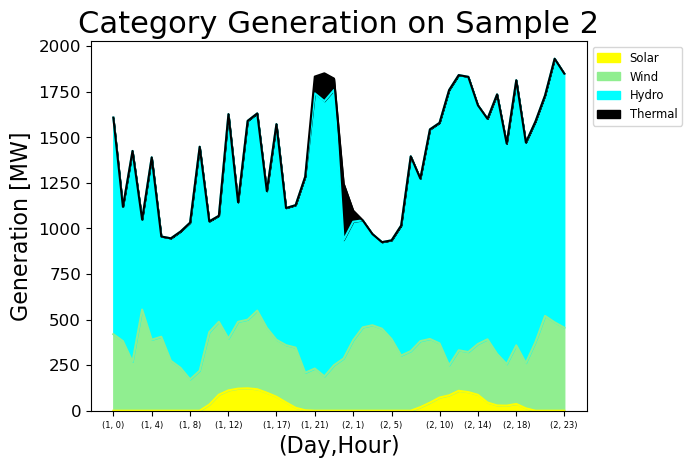

In [25]:
#### Dictionary
color={
    'Solar':'yellow',
    'Wind':'lightgreen',
    'Hydro':'aqua',
    'Thermal':'black'
}

def generation_plot_category(dataframe):
    ##### Grafico generacion mensual por tecnologia
    dataframe.plot(kind='area', style=color).legend(bbox_to_anchor=(1.0,1.0), fontsize='small')
    plt.xlabel('(Day,Hour)' , fontsize=16)  # Etiqueta del eje x
    plt.ylabel('Generation [MW]',  fontsize=16)  # Etiqueta del eje y
    plt.title('Category Generation on Sample 2',  fontsize=22)  # Título del gráfico
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    num_ticks = 12  # Puedes ajustarlo según la cantidad de etiquetas que quieras en el eje X
    x_positions = np.linspace(0, len(dataframe.index) - 1, num_ticks, dtype=int)
    x_labels = dataframe.index[x_positions]  
    plt.xticks(ticks=x_positions, labels=x_labels, fontsize=6)
    plt.yticks(fontsize=12)
    plt.show()

generation_per_category = df_gen_category.pivot_table(index=['day','hour'], columns='category_name', values='value')
column_order = ['Solar', 'Wind', 'Hydro', 'Thermal']  # Ajusta los nombres según las columnas que tengas
column_order = [col for col in column_order if col in generation_per_category.columns]
generation_per_category = generation_per_category[column_order]
print(generation_per_category)
generation_plot_category(generation_per_category)

child_name       Node3                                                  
sample_name       Mean  Sample 1  Sample 2  Sample 3  Sample 4  Sample 5
day hour                                                                
1   0            0.010      0.01      0.01      0.01      0.01      0.01
    1            0.010      0.01      0.01      0.01      0.01      0.01
    2            0.010      0.01      0.01      0.01      0.01      0.01
    3            0.010      0.01      0.01      0.01      0.01      0.01
    4            0.010      0.01      0.01      0.01      0.01      0.01
    5            0.010      0.01      0.01      0.01      0.01      0.01
    6            0.010      0.01      0.01      0.01      0.01      0.01
    7            0.010      0.01      0.01      0.01      0.01      0.01
    8            0.010      0.01      0.01      0.01      0.01      0.01
    9            0.010      0.01      0.01      0.01      0.01      0.01
    10           0.010      0.01      0.01      0.0

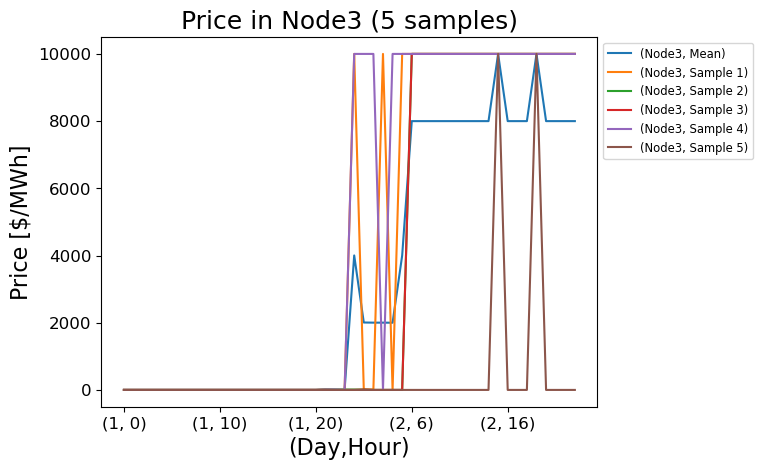

In [26]:
def prices_lines(dataframe):
    dataframe.plot().legend(bbox_to_anchor=(1.0,1.0), fontsize='small')
    plt.xlabel('(Day,Hour)' , fontsize=16)  # Etiqueta del eje x
    plt.ylabel('Price [$/MWh]',  fontsize=16)  # Etiqueta del eje y
    plt.title('Price in Node3 (5 samples)',  fontsize=18)  # Título del gráfico
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


prices_per_nodes = df_price_nodes.pivot_table(index=['day','hour'], columns=['child_name','sample_name'], values='value')
print(prices_per_nodes)
prices_lines(prices_per_nodes)

child_name        L1-2                                                       
sample_name       Mean   Sample 1   Sample 2   Sample 3   Sample 4   Sample 5
day hour                                                                     
1   0        18.994720  30.378200  11.375000   0.000000  24.258200  28.962200
    1        12.888424  17.158735  18.492671   7.624904  21.165810   0.000000
    2        10.705434  19.760852  11.375000   0.000000  22.391319   0.000000
    3         9.682186   0.000000   0.000000   0.000000  32.500000  15.910929
    4        12.060404  13.245598  13.837531  21.843891  11.375000   0.000000
    5        11.938892  10.877121   0.000000  10.185699  11.375000  27.256639
    6         6.907495   3.138751   0.607233   0.000000  30.791490   0.000000
    7        12.374939   0.000000  32.500000  17.999693  11.375000   0.000000
    8         9.522644  16.030701   0.000000   0.000000  31.582518   0.000000
    9        13.117181  11.375000  11.375000   0.000000  27.5959

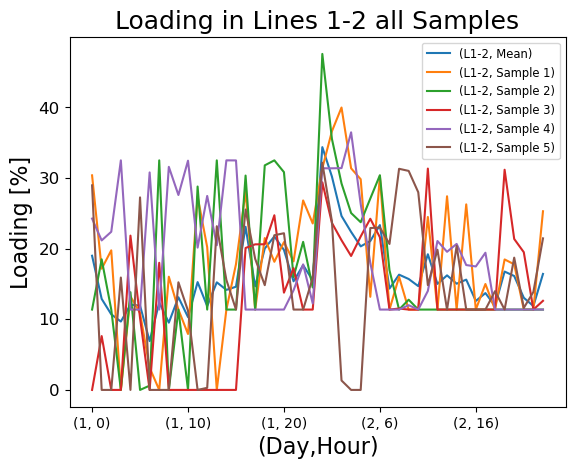

In [27]:
def loading_lines(dataframe):
    dataframe.plot().legend(bbox_to_anchor=(1.0,1.0), fontsize='small')
    plt.xlabel('(Day,Hour)' , fontsize=16)  # Etiqueta del eje x
    plt.ylabel('Loading [%]',  fontsize=16)  # Etiqueta del eje y
    plt.title('Loading in Lines 1-2 all Samples',  fontsize=18)  # Título del gráfico
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=12)
    plt.show()


loading_per_lines = df_loading_lines.pivot_table(index=['day','hour'], columns=['child_name','sample_name'], values='value')
print(loading_per_lines)
loading_lines(loading_per_lines)

day              1                                                  \
hour            0           1           2           3           4    
sample_name                                                          
Mean         420.0  421.505568  376.475135  389.703695  349.247480   
Sample 1     420.0  415.825310  498.239708  414.701643  396.445370   
Sample 2     420.0  381.993198  269.032288  555.357571  389.658165   
Sample 3     420.0  406.501923  203.039804  294.447098  330.748386   
Sample 4     420.0  469.409952  440.167522  395.855970  232.599792   
Sample 5     420.0  433.797455  471.896353  288.156195  396.785688   

day                                                                      ...  \
hour                 5           6           7           8           9   ...   
sample_name                                                              ...   
Mean         353.130086  356.840921  331.922464  251.478509  246.501861  ...   
Sample 1     378.457575  323.224983  469.519529  

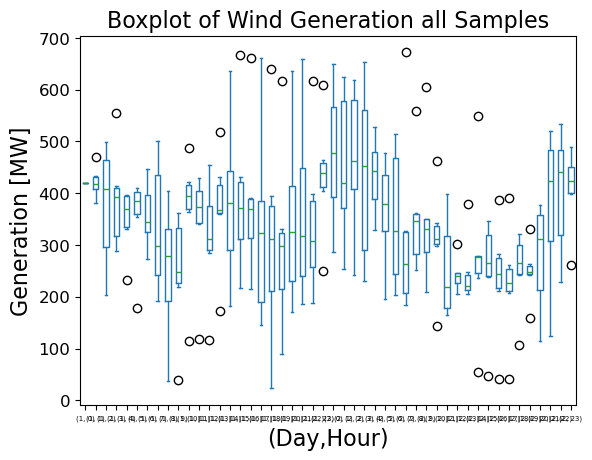

In [28]:
def generation_boxplot(dataframe):
    dataframe.plot(kind='box')
    plt.xlabel('(Day,Hour)' , fontsize=16)  # Etiqueta del eje x
    plt.ylabel('Generation [MW]',  fontsize=16)  # Etiqueta del eje y
    plt.title('Boxplot of Wind Generation all Samples',  fontsize=16)  # Título del gráfico
    plt.xticks(fontsize=5)
    plt.yticks(fontsize=12)
    plt.show()

plot_generator_generation = df_gen_generation.pivot_table(index=['sample_name'], columns=['day','hour',], values='value')
print(plot_generator_generation)
generation_boxplot(plot_generator_generation)